# Análisis de factores que influyen en el precio de venta de un vehículo
## Introducción
Crankshaft List es un portal web dedicado a la comercialización de vehículos de todo tipo, desde modelos usados hasta nuevos. Con un solo click puedes conocer el año de fabricación del vehículo, el millaje, la transmisión, el color, el número de cilindrada y su condición. Cientos de anuncios gratuitos son publicados cada día, facilitando la compra de autos y sobretodo, ahorrando tiempo a nuestros compradores y vendedores.

Con el aumento en el número de usuarios y anuncios, es necesario analizar la información que tenemos disponible para mejorar nuestros servicios. Es así que una de las inquietudes que ha surgido en los últimos años es sobre los factores que están influyendo en el precio de los vehículos, causando un retraso en la compra o haciendo que ésta se realice de una forma más rápida.

En base a esto hemos realizado un análisis de nuestras bases de datos, para encontrar qué factores hacen que un vehículo en Crankshaft List se venda a un mayor o menor precio. Para responder a esta inquietud, nos centraremos en la edad, millaje, condición, tipo de transmisión y color, y encontremos el parámetro o grupo de parámetros que influyen en la decisión de nuestros compradores.

# Objetivos

Vamos a probar las siguientes hipótesis:

1. **Impacto de la Edad del Vehículo en el Precio de Venta**: Se investigará si la edad de un vehículo influye en su precio de venta en nuestro sitio web. Se espera que los autos más antiguos tengan precios más bajos en comparación con los autos más nuevos.

2. **Relación entre el Número de Millas Recorridas y el Precio de Venta**: Se analizará si el número de millas recorridas afecta el precio de venta de un vehículo. Se anticipa que los autos con millajes más altos tendrán precios más bajos debido a un posible mayor desgaste o necesidad de reparaciones.

3. **Impacto de la Condición del Vehículo en el Precio de Venta**: Se evaluará cómo la condición del vehículo en el momento de la venta afecta su precio en nuestro sitio web. Se espera que los autos en condiciones nuevas tengan precios más altos, mientras que aquellos en condiciones de rescate tengan precios más bajos debido a la necesidad de posibles reparaciones.

4. **Influencia del Tipo de Transmisión en el Valor del Vehículo**: Se analizará si el tipo de transmisión afecta el valor de un auto en nuestro sitio web. Se espera que los vehículos con transmisión automática se vendan a precios más altos en comparación con los vehículos con transmisión manual.

5. **Efecto del Color del Vehículo en el Precio de Venta**: Se examinará cómo el color del vehículo puede influir en su precio de venta al público. Se anticipa que los autos en colores blanco, gris y negro tendrán precios más altos debido a una mayor demanda por parte de los compradores.


# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### Cargar datos

In [2]:
# Carga el archivo de datos en un DataFrame
data = pd.read_csv('/datasets/vehicles_us.csv')


### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

[Al comprender los campos, explóralos para familiarizarte con los datos.]

In [3]:
# información general/resumida sobre el DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


la columna date_posted es de tipo objeto cuando debería ser tipo fecha

In [4]:
data['date_posted']=pd.to_datetime(data['date_posted'])
data.dtypes

price                    int64
model_year             float64
model                   object
condition               object
cylinders              float64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                 float64
date_posted     datetime64[ns]
days_listed              int64
dtype: object

* Se crea dos columnas de año de publicación y edad del carro la cual serán utilizadas más adelante

In [5]:
# muestra de datos
data.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [6]:
data.isna().sum()


price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [7]:
data.isna().sum()/data.shape[0]*100

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [8]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


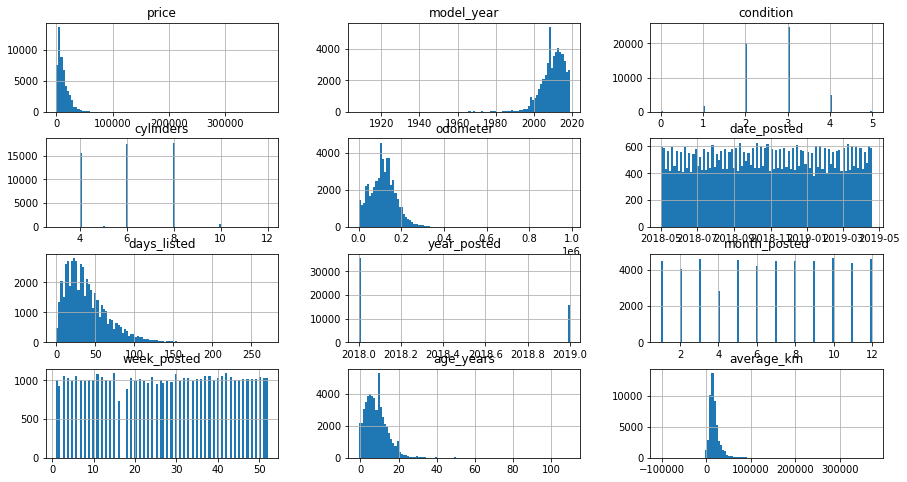

In [65]:
data.hist(figsize=(15,8), bins=100)
plt.show()

In [10]:
sorted(data['model'].unique())

['acura tl',
 'bmw x5',
 'buick enclave',
 'cadillac escalade',
 'chevrolet camaro',
 'chevrolet camaro lt coupe 2d',
 'chevrolet colorado',
 'chevrolet corvette',
 'chevrolet cruze',
 'chevrolet equinox',
 'chevrolet impala',
 'chevrolet malibu',
 'chevrolet silverado',
 'chevrolet silverado 1500',
 'chevrolet silverado 1500 crew',
 'chevrolet silverado 2500hd',
 'chevrolet silverado 3500hd',
 'chevrolet suburban',
 'chevrolet tahoe',
 'chevrolet trailblazer',
 'chevrolet traverse',
 'chrysler 200',
 'chrysler 300',
 'chrysler town & country',
 'dodge charger',
 'dodge dakota',
 'dodge grand caravan',
 'ford econoline',
 'ford edge',
 'ford escape',
 'ford expedition',
 'ford explorer',
 'ford f-150',
 'ford f-250',
 'ford f-250 sd',
 'ford f-250 super duty',
 'ford f-350 sd',
 'ford f150',
 'ford f150 supercrew cab xlt',
 'ford f250',
 'ford f250 super duty',
 'ford f350',
 'ford f350 super duty',
 'ford focus',
 'ford focus se',
 'ford fusion',
 'ford fusion se',
 'ford mustang',
 '

In [11]:


data['model']=data['model'].replace('ford f-150', 'ford f150')
data['model']=data['model'].replace('ford f-250','ford f250')
data['model']=data['model'].replace(['ford f-250 sd','ford f-250 super duty','f-250 super duty'],'ford f250 super duty')
data['model']=data['model'].replace('ford f-350','ford f350')
data['model']=data['model'].replace('ford f-350 sd','ford f350 super duty')

In [12]:
sorted(data['model'].unique())

['acura tl',
 'bmw x5',
 'buick enclave',
 'cadillac escalade',
 'chevrolet camaro',
 'chevrolet camaro lt coupe 2d',
 'chevrolet colorado',
 'chevrolet corvette',
 'chevrolet cruze',
 'chevrolet equinox',
 'chevrolet impala',
 'chevrolet malibu',
 'chevrolet silverado',
 'chevrolet silverado 1500',
 'chevrolet silverado 1500 crew',
 'chevrolet silverado 2500hd',
 'chevrolet silverado 3500hd',
 'chevrolet suburban',
 'chevrolet tahoe',
 'chevrolet trailblazer',
 'chevrolet traverse',
 'chrysler 200',
 'chrysler 300',
 'chrysler town & country',
 'dodge charger',
 'dodge dakota',
 'dodge grand caravan',
 'ford econoline',
 'ford edge',
 'ford escape',
 'ford expedition',
 'ford explorer',
 'ford f150',
 'ford f150 supercrew cab xlt',
 'ford f250',
 'ford f250 super duty',
 'ford f350',
 'ford f350 super duty',
 'ford focus',
 'ford focus se',
 'ford fusion',
 'ford fusion se',
 'ford mustang',
 'ford mustang gt coupe 2d',
 'ford ranger',
 'ford taurus',
 'gmc acadia',
 'gmc sierra',
 'g

### Conclusiones y siguientes pasos

Lo primero que observamos es que dentro del dataframe hay columnas que no coinciden sus registros con el numero total de filas, lo cual nos da a entender que faltan valores en dichas columnas.

Las columnas que tienen datos faltantes son:
*                vacíos vs no vacíos /porcentaje

* `model_year`  3619 / 47906 registros/  7.023%
* `cylinders`   5260 / 46265 registros/ 10.21%
* `odometer`    7892 / 43633 registros/ 15.32%
* `paint_color` 9267 / 42258 registros/ 17.99%
* `is_4wd`     25953 / 25572 registros/ 50.37%,  esta es la columna con mas valores vacíos, prácticamente la mitad, habrá que analizar el porqué 


* vemos que también la columna `date_posted` no tiene el campo como tipo fecha, lo cual debería se cambiada para poder hacer calculos de fecha mas adelante

* se visuliza también que en la columna odometro hay un valor máximo de 990000 km lo cual parece extraño como también valores  en cero 

* en dias publicados hay anuncios de 271 días


## Tratar los valores ausentes (si hay)

ya vimos cuantos valores faltantes hay, ahora veremos por columnas si hay algún sentido de por qué faltan valores

In [13]:
print ('* valores unicos de año de modelo ', data['model_year'].sort_values().unique())
print ()
print ('* valores unicos de cilindro ',data['cylinders'].sort_values().unique())
print ()
print ('* valores unicos de kilometraje ',data['odometer'].sort_values().unique())
print ()
print ('* valores unicos demodelo ',data['paint_color'].sort_values().unique())
print ()
print ('* valores unicos de tracción ',data['is_4wd'].sort_values().unique())
print ()


* valores unicos de año de modelo  [1908. 1929. 1936. 1948. 1949. 1954. 1955. 1958. 1960. 1961. 1962. 1963.
 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975.
 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987.
 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999.
 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011.
 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019.   nan]

* valores unicos de cilindro  [ 3.  4.  5.  6.  8. 10. 12. nan]

* valores unicos de kilometraje  [0.0e+00 1.0e+00 2.0e+00 ... 9.8e+05 9.9e+05     nan]

* valores unicos demodelo  ['black' 'blue' 'brown' 'custom' 'green' 'grey' 'orange' 'purple' 'red'
 'silver' 'white' 'yellow' nan]

* valores unicos de tracción  [ 1. nan]



#### LLenar datos vaciós de `model_year`
* Agrupamos por modelo y por transmisión y sacamos la moda ya que llenaremos los años del modelo por el año que más se repite asi evitaremos tener años con decimales la cual nos brinda la media y la mediana

In [14]:
'''
model_year_pivot= data2.pivot_table(
    index=['model','transmission'],
    values='model_year',
    aggfunc='mean'
).apply(round)
model_year_pivot.head(10)
'''
from statistics import mode
model_year_pivot= data.pivot_table(
    index=['model','transmission'],
    values='model_year',
    aggfunc=mode
)
model_year_pivot.head(40)



model_year
model                         transmission            
acura tl                      automatic         2007.0
                              manual            2004.0
bmw x5                        automatic         2012.0
                              manual            2007.0
                              other             2001.0
buick enclave                 automatic         2012.0
                              manual            2016.0
cadillac escalade             automatic         2007.0
                              manual            2007.0
chevrolet camaro              automatic         2011.0
                              manual            2018.0
                              other             2015.0
chevrolet camaro lt coupe 2d  automatic         2014.0
                              manual            2016.0
                              other             2017.0
chevrolet colorado            automatic         2016.0
                              manual            2006.0
                              other             2009.0
chevrolet corvette            automatic         2002.0
                              manual            2007.0
                              other             2016.0
chevrolet cruze               automatic         2014.0
                              manual            2011.0
                              other             2011.0
chevrolet equinox             automatic         2013.0
                              manual            2010.0
chevrolet impala              automatic         2008.0
                              manual            2015.0
chevrolet malibu              automatic         2013.0
                              manual            2016.0
                              other             2010.0
chevrolet silverado           automatic         2008.0
                              manual            2006.0
chevrolet silverado 1500      automatic         2014.0
                              manual            1995.0
                              other             2012.0
chevrolet silverado 1500 crew automatic         2014.0
                              other             2018.0
chevrolet silverado 2500hd    automatic         2006.0
                              manual            2003.0

Vamos a proceder a llenar los valores vacíos de los años del modelo de carro 

In [15]:
def llenar_anio(model_year, model, transmission, model_year_pivot):
    if pd.isna(model_year):
        try:
            return model_year_pivot.loc[(model, transmission)][0]
        except:
            # Si no se encuentra un valor de moda específico para el modelo y la transmisión,
            # se devuelve la moda general de la columna 'model_year'
            return model_year_pivot['model_year'].mode()[0]
    return model_year




In [16]:
data['model_year'] = data.apply(lambda x: llenar_anio(x['model_year'], x['model'], x['transmission'], model_year_pivot), axis=1)

data.info()
data['model_year'].unique()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        25572 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2013.0,ford f150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


#### Llenar datos vacíos de `cylinders`

Utilizaremos la misma formula, agruparemos la información de nuestro dataframe sin valores nulos, por su modelo y transmision, podemos agregarle el año del modelo, pero casi no varió su valor, la función que se escoge es la moda ya que los cilindrajes son número enteros y un promedio o una mediana no nos serviría para llenar los datos


In [17]:
cylinders_pivot= data.pivot_table(
    index=['model','transmission'],
    values='cylinders',
    aggfunc=mode
)

cylinders_pivot.head(40)



cylinders
model                         transmission           
acura tl                      automatic           6.0
                              manual              6.0
bmw x5                        automatic           6.0
                              manual              8.0
                              other               6.0
buick enclave                 automatic           6.0
                              manual              6.0
cadillac escalade             automatic           8.0
                              other              10.0
chevrolet camaro              automatic           6.0
                              manual              8.0
                              other              10.0
chevrolet camaro lt coupe 2d  automatic           6.0
                              manual              6.0
                              other               6.0
chevrolet colorado            automatic           6.0
                              manual              4.0
                              other              10.0
chevrolet corvette            automatic           8.0
                              manual              8.0
                              other              10.0
chevrolet cruze               automatic           4.0
                              manual              4.0
                              other               4.0
chevrolet equinox             automatic           4.0
                              manual              6.0
chevrolet impala              automatic           6.0
                              manual              6.0
chevrolet malibu              automatic           4.0
                              manual              4.0
                              other               6.0
chevrolet silverado           automatic           8.0
                              manual              8.0
chevrolet silverado 1500      automatic           8.0
                              manual              8.0
                              other               8.0
chevrolet silverado 1500 crew automatic           8.0
                              other               8.0
chevrolet silverado 2500hd    automatic           8.0
                              manual              8.0

In [18]:
def llenar_cilindros(cylinders, model, transmission, cylinders_pivot):
    if pd.isna(cylinders):
        try:
            return cylinders_pivot.loc[(model, transmission)][0]
        except:
            # Si no se encuentra un valor de moda específico para el modelo y la transmisión,
            # se devuelve la moda general de la columna 'cylinders'
            return cylinders_pivot['cylinders'].mode()[0]
    return cylinders



In [19]:
data['cylinders'] = data.apply(lambda x: llenar_cilindros(x['cylinders'], x['model'], x['transmission'], cylinders_pivot), axis=1)







#### Llenar datos vacíos a `odometer`
para llenar los datos vacíos en odometer agruparemos los datos en nuestro dataframe sin valores nulos  y lo filtraremos por condicion del carro,  pero como hablamos de kilometraje sería tambien que se agrupara también por el año del modelo, por lo que crearemos una columna la cual los agrupe por rango de años del modelo, colocaremos un período de 5 años, asi evitaremos que nos dé un error en caso de que no exista el año, y el método que usaremos para calcular el kilometraje será la mediana ya que hay vehículos que tiene valores super altos o en cero y al agruparlos y sacar un promedio nos daría valores irreales

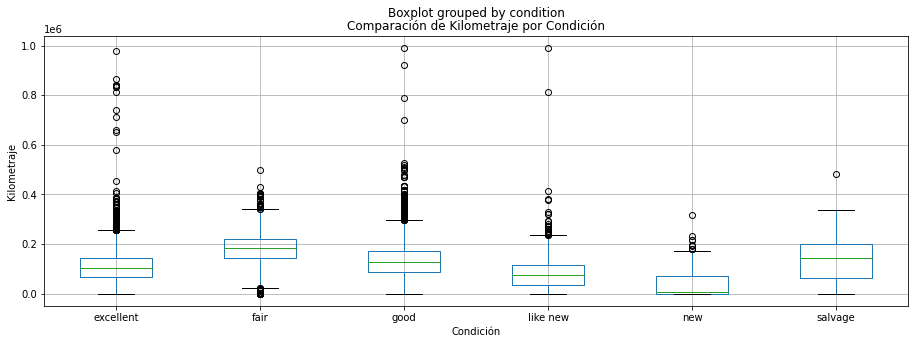

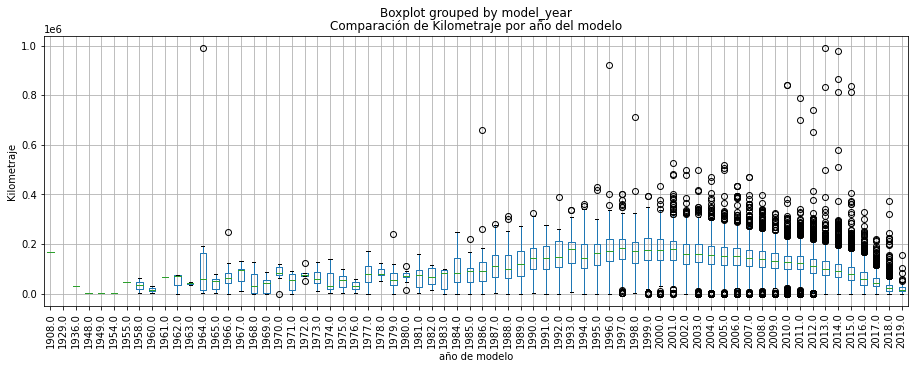

In [20]:
data.boxplot(by='condition', column='odometer', figsize=(15,5))
plt.xlabel('Condición')
plt.ylabel('Kilometraje')
plt.title('Comparación de Kilometraje por Condición')
plt.show()
data.boxplot(by='model_year', column='odometer', figsize=(15,5))
plt.xlabel('año de modelo')
plt.ylabel('Kilometraje')
plt.title('Comparación de Kilometraje por año del modelo')
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels(labels, rotation=90)
plt.show()

* **vemos que en nuestro dataframe sin datos no hay modelos de antes de 1970 pero en nuestro dataframe completo si, asi que crearemos el rango desde 1970 en adelante cada 5 años** y nuestra agrupación será primero por condición y luego por año, y si no se encuentra condición que calce se la sustituirá por la mediana de condición

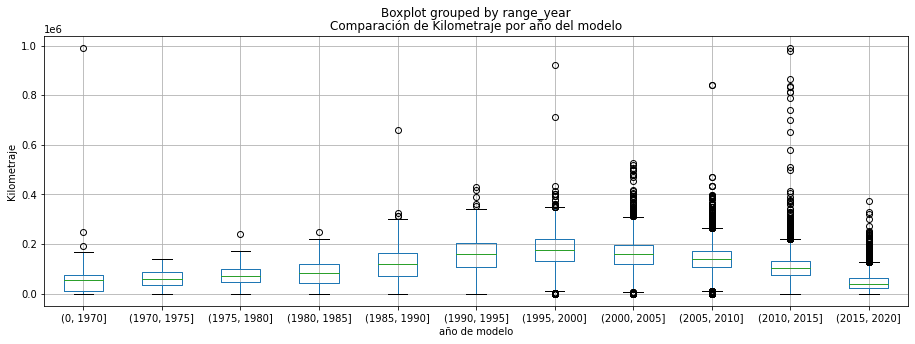

In [21]:
data['range_year']=pd.cut(data['model_year'], bins=[0,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020])
data['range_year']=pd.cut(data['model_year'], bins=[0,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020])

data.boxplot(by='range_year',figsize=(15,5), column='odometer')
plt.xlabel('año de modelo')
plt.ylabel('Kilometraje')
plt.title('Comparación de Kilometraje por año del modelo')
plt.show()

In [22]:

odometer_pivot= data.pivot_table(
    index=['condition','range_year'],
    values='odometer',
    aggfunc='median'
)
odometer_pivot.head()

odometer_condition_pivot= data.pivot_table(
    index='condition',
    values='odometer',
    aggfunc='median'
)
odometer_condition_pivot.head()


,odometer
condition,
excellent,104230.0
fair,181613.0
good,129000.0
like new,72982.5
new,8002.0


In [23]:
def llenar_odometer(odometer, condition, range_year, odometer_pivot):
    if pd.isna(odometer):
        try:
            return odometer_pivot['odometer'][condition][range_year]
        except:           
            return odometer_condition_pivot['odometer'][condition]
    return odometer

In [24]:
data['odometer']=data.apply(lambda x: llenar_odometer(x['odometer'], x['condition'], x['range_year'], odometer_pivot), axis=1)

#### LLenar datos vacíos de `is_4wd`
* Como vimos antes en tracción is_4wd practicamente es la mitad de valores que son ausentes, y también sabemos que es una variable categórica de que si el carro tiene tracción en las cuatro ruedas, por lo que asumiremos que los datos faltantes significa que el carro no tiene esta característica. la cual procedemos a reemplazar el nan por cero

In [25]:
data['is_4wd']=data['is_4wd']==1
data['is_4wd'].unique()

array([ True, False])

#### Llenar datos vacíos de `paint color`
En esta columna es dificil decifrar que color pertenece a que modelo de carro, ya que un carro puede tener cualquier gama de colores, asi que en vez de tratar de adivinar el color del carro, crearemos una categoría llamada `unknown color`

In [26]:
data['paint_color'].fillna('unknown color', inplace=True)
data.info()
data[data['paint_color']=='unknown color']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  range_year    51525 non-null  category      
dtypes: bool(1), category(1), datetime64[ns](1), float64(3), int64(2), object(6)
memory usa

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,range_year
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown color,True,2018-06-23,19,"(2010, 2015]"
3,1500,2003.0,ford f150,fair,8.0,gas,186000.0,automatic,pickup,unknown color,False,2019-03-22,9,"(2000, 2005]"
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown color,True,2018-07-16,19,"(2010, 2015]"
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,unknown color,True,2019-04-02,37,"(2010, 2015]"
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,unknown color,False,2018-08-22,8,"(2005, 2010]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,unknown color,False,2019-04-01,175,"(2010, 2015]"
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,unknown color,False,2019-02-27,73,"(2010, 2015]"
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,unknown color,True,2019-04-11,25,"(2015, 2020]"
51519,11750,2015.0,honda accord,excellent,4.0,gas,99739.0,automatic,coupe,unknown color,False,2018-11-24,89,"(2010, 2015]"


## Corregir los tipos de datos

[Ya que los datos están más o menos completos ahora, corrige los tipos de datos si es necesario.]

In [27]:
data.dtypes

price                    int64
model_year             float64
model                   object
condition               object
cylinders              float64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
range_year            category
dtype: object

In [28]:
data['model_year'] = data['model_year'].astype(int)    #cambiamos a entero model year
data['cylinders'] = data['cylinders'].astype(int)      #cambiamos a entero cylinders
data['date_posted']=pd.to_datetime(data['date_posted'])
data.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
range_year            category
dtype: object

## Enriquecer datos

[Agrega factores adicionales a los datos para facilitar el análisis.]

In [29]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio
data['year_posted']=data['date_posted'].dt.year
data['month_posted']=data['date_posted'].dt.month

In [30]:
#data['week_posted']=data['date_posted'].dt.week
data['week_posted'] = data['date_posted'].dt.isocalendar().week

In [31]:
# Agrega los años del vehículo cuando el anuncio se colocó
data['age_years']=data['year_posted']-data['model_year']

* Eliminamos la columna `range_years` ya que era una columna temporal y no se la va a utilizar nuevamente

In [32]:

data = data.drop('range_year', axis=1)


In [33]:
# Agrega el millaje promedio del vehículo por año

data['average_km']=data['odometer']/data['age_years']

data['average_km'] = np.where(np.isinf(data['average_km']), data['odometer'], data['average_km'])
#data

In [34]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente
data['condition'].sort_values().unique()

data['condition']=data['condition'].replace('good',2)
data['condition']=data['condition'].replace('like new',4)
data['condition']=data['condition'].replace('fair',1)
data['condition']=data['condition'].replace('excellent',3)
data['condition']=data['condition'].replace('salvage',0)
data['condition']=data['condition'].replace('new',5)
data['condition'].sort_values().unique()
data['condition'].value_counts()



3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

## Comprobar datos limpios

Primero comprobemos si hay algún dato repetido

In [35]:
data.duplicated().sum()

0

[Dado que los datos están listos para el análisis, échales otro vistazo rápido. Es útil ver qué es exactamente lo que vas a utilizar para el análisis.]

In [36]:
# imprime la información general/resumida sobre el DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  year_posted   51525 non-null  int64         
 14  month_posted  51525 non-null  int64         
 15  week_posted   51525 non-null  UInt32

In [37]:
# imprimir una muestra de datos
data.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,week_posted,age_years,average_km
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown color,True,2018-06-23,19,2018,6,25,7,20714.285714
1,25500,2013,ford f150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2018,10,42,5,17741.000000
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2019,2,6,6,18333.333333
3,1500,2003,ford f150,1,8,gas,186000.0,automatic,pickup,unknown color,False,2019-03-22,9,2019,3,12,16,11625.000000
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2019,4,14,2,40451.500000
5,14990,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2018,6,25,4,14488.500000
6,12990,2015,toyota camry,3,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,2018,12,52,3,26404.000000
7,15990,2013,honda pilot,3,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,2019,1,2,6,18245.500000
8,11500,2012,kia sorento,3,4,gas,104174.0,automatic,SUV,unknown color,True,2018-07-16,19,2018,7,29,6,17362.333333
9,9200,2008,honda pilot,3,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,2019,2,7,11,13381.000000


## Estudiar parámetros principales

[Elige un enfoque apropiado para estudiar los parámetros enumerados a continuación, presta especial atención a cómo los valores atípicos afectan la forma y la legibilidad de los histogramas.]

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

In [38]:
variables = ['price','age_years','odometer','cylinders','condition']

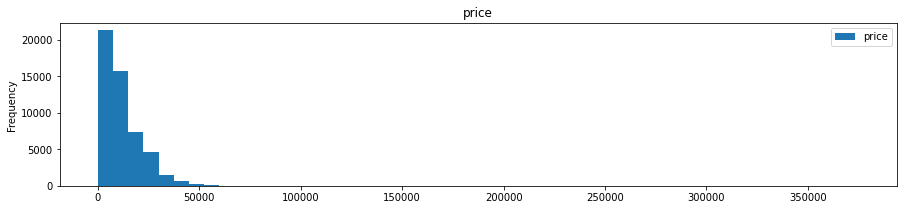

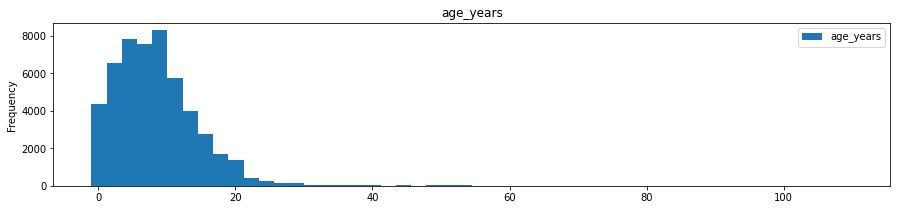

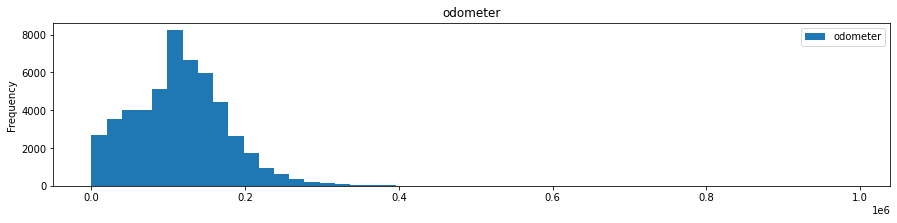

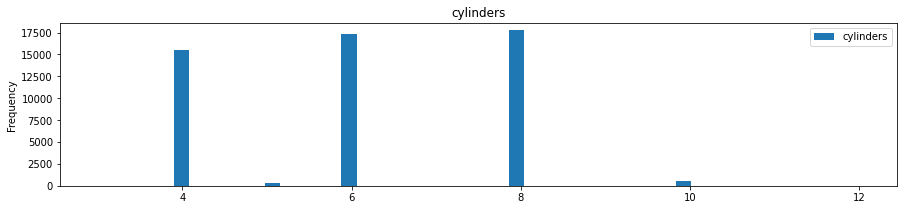

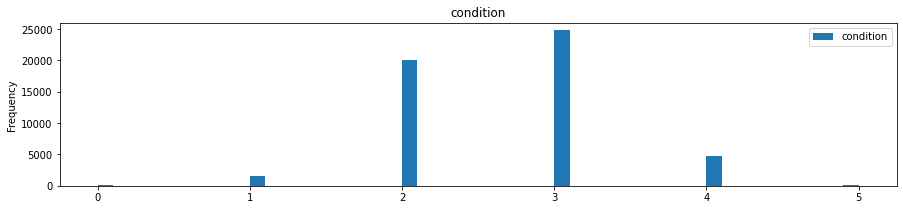

In [39]:
for i in variables:
    data.plot(y=i, bins=50, kind='hist',title= i, figsize=(15,3))
    #data[i].plot(kind='box')
    #plt.show()
   
    

*Al ver las columnas price, age_years y odometer notamos que hay datos q no parecen tan reales
como por ejemplo en price, vemos precios de vehículos muy baratos y también en cero
en age year se puede visualizar que hay carros que llevan mas de 50 años
y en odometer hay kilometrajes que llegan casi a un millon de kms 

En cylinders y condition, todo se ve normal

todo esto revisaremos que puede estar pasando y en que nos afecta si no usamos estos datos atípicos

## Estudiar y tratar valores atípicos

[Con los resultados anteriores, determina qué columnas pueden contener valores atípicos y crea un DataFrame sin esos valores atípicos. Pista: los valores atípicos se pueden identificar tras definir el límite inferior/superior para el rango normal de valores.]

gráfico de ` price `
q1=  5000.0  | q3=  16839.0  | IRQ=  11839.0  | median : 9000.0  | lim min:  -12758.5  | lmax:  34597.5


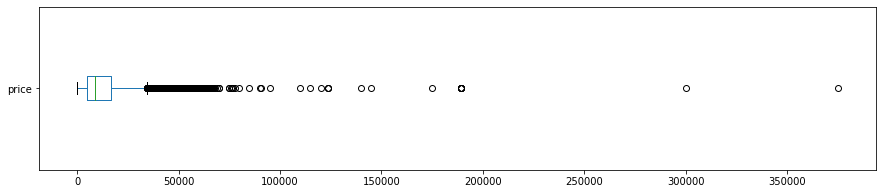

gráfico de ` age_years `
q1=  4.0  | q3=  12.0  | IRQ=  8.0  | median : 7.0  | lim min:  -8.0  | lmax:  24.0


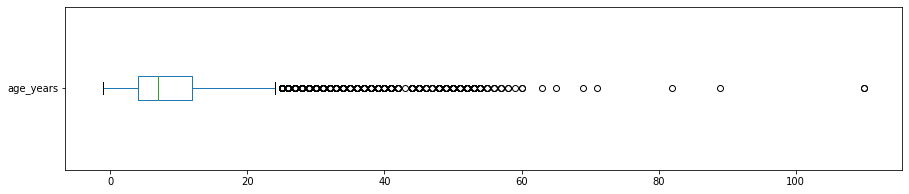

gráfico de ` odometer `
q1=  73283.0  | q3=  151000.0  | IRQ=  77717.0  | median : 112000.0  | lim min:  -43292.5  | lmax:  267575.5


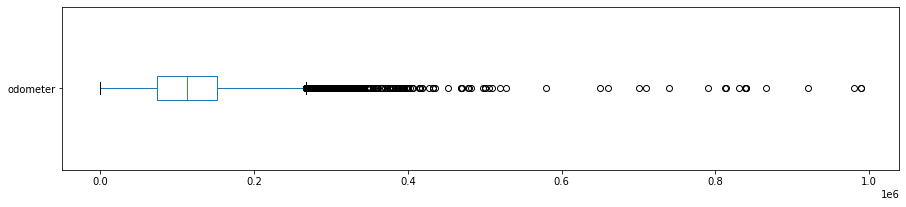

gráfico de ` cylinders `
q1=  4.0  | q3=  8.0  | IRQ=  4.0  | median : 6.0  | lim min:  -2.0  | lmax:  14.0


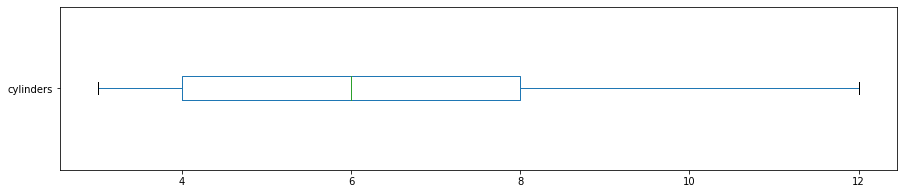

gráfico de ` condition `
q1=  2.0  | q3=  3.0  | IRQ=  1.0  | median : 3.0  | lim min:  0.5  | lmax:  4.5


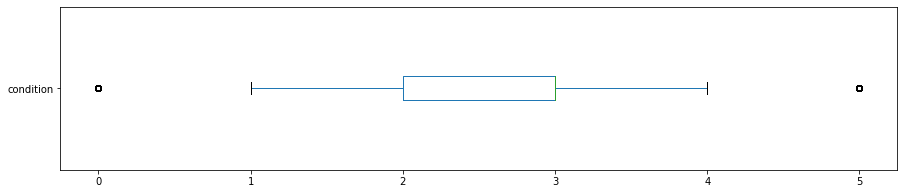

In [40]:
for i in variables:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    Q2 = data[i].quantile(0.5)
    IQR = Q3 - Q1
    lmin= Q1 - 1.5*IQR
    lmax= Q3 + 1.5*IQR
    print('====='*20)
    print('gráfico de `', i,'`')
    print('q1= ',Q1,' | q3= ',Q3,' | IRQ= ',IQR,' | median :',Q2,' | lim min: ',lmin,' | lmax: ',lmax)
    data[i].plot(kind='box', vert=False, figsize=(15,3))
    #plt.hlines(y= Q1 - 1.5*IQR ,xmin=0.9 , xmax=1.1, color='red')
    plt.show()
    print('====='*20)

### Valores atípicos superiores e inferiores de  `price`

 # Registros superiores al límite superior : 1646


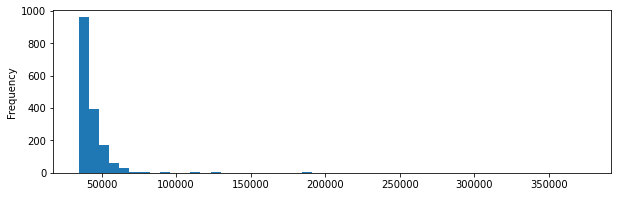

In [41]:
data['price'].where(data['price']> 34597.5).plot(kind='hist',bins=50,figsize=(10,3))

print (' # Registros superiores al límite superior :', data['price'].where(data['price']> 34597.5).count())

* Aunque el límite inferior de la columna price es cero, es dificil de creer que hayan autos a la venta por menos de 500 dolares alrededor del mundo, se tomó la muestra son 1069 vehículos de 51525 registrados que cumplen con esta condición, por lo cual la determinaremos como atípica

 # Registros inferiores al límite inferior :  1069


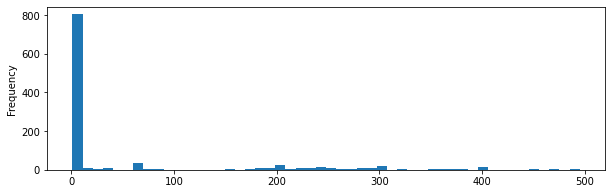

In [42]:
data['price'].where(data['price']< 500).plot(kind='hist',bins=50,figsize=(10,3))
print(' # Registros inferiores al límite inferior : ', data['price'].where(data['price']< 500).count())

* Como estamos analizando lo valores atípicos por variable, una vez filtrado los datos atípicos por precio, 

In [43]:
data_by_price= data.where((data['price']> 500) & (data['price']< 34597.5))


### Valores atípicos de age_years

692


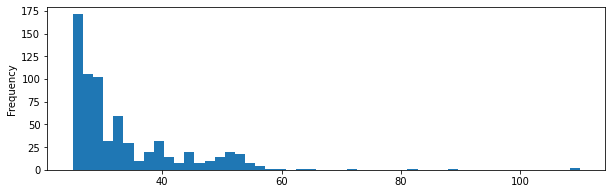

In [44]:
data_by_price['age_years'].where(data_by_price['age_years']> 24).plot(kind='hist',bins=50,figsize=(10,3))
print (data_by_price['age_years'].where(data_by_price['age_years']> 24).count())
data_price_age = data_by_price.where((data_by_price['age_years']< 24))

* según los calculos del límite superior los autos mayores a 24 años no son tan relevantes por lo que escogeremos solo los que tienen menos de 24 años


### Valores atípicos de Odometer
Según la fórmula de valores atípicos, nuestro límite superior se encuentra hasta los 268017.5 Km por lo que escogeremos los valores a dicho kilometraje y como si puede existir vehículos con kilometraje cero, no tendremos un límite inferior

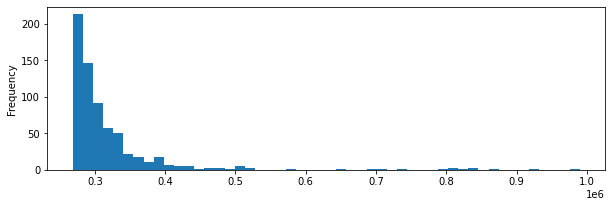

In [45]:
data_price_age['odometer'].where(data_price_age['odometer']> 268017.5).plot(kind='hist',bins=50,figsize=(10,3))
data_price_age['odometer'].where(data_price_age['odometer']> 268017.5).count()
good_data=data_price_age.where(data_price_age['odometer']< 268017.5)

### Valores atípicos de Condition
En la gráfica del punto 3.6 vemos que en la gráfica de condición no hay tanto valor atípico fuera de los límites, pero hay valores muy pequeños, por lo que haremos un conteo de los mismos

,price
condition,
0.0,97
1.0,1299
2.0,19033
3.0,22530
4.0,4171
5.0,87


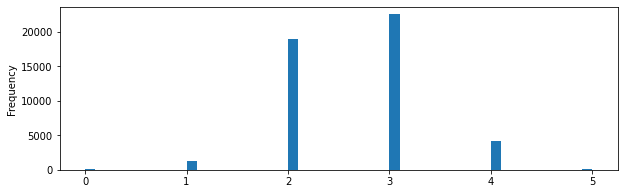

In [46]:
good_data['condition'].plot(kind='hist',bins=50,figsize=(10,3))
good_data.pivot_table(index='condition', values='price', aggfunc='count')

* Vemos que tanto la clasificación "como nuevo" (5)  y para rescate (0) son muy pequeñas (menos de 100 registros) , por que sacarlos de muestra no nos afectaría en mucho, asi que filtraremos esos datos


In [47]:
good_data=good_data.where((data['condition']>0)&(data['condition']<5))


### Valores atípicos de Condition
clasificaremos la data que tenemos ahora para ver los valores atípicos del cilindraje

,price
cylinders,
3,34
4,15543
5,272
6,17355
8,17733
10,586
12,2


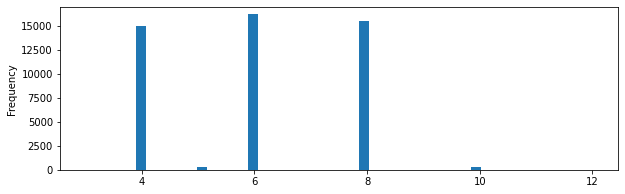

In [48]:
good_data['cylinders'].plot(kind='hist',bins=50,figsize=(10,3))

data.pivot_table(index='cylinders', values='price', aggfunc='count')

<AxesSubplot:ylabel='Frequency'>

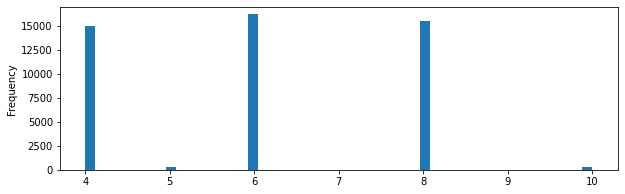

In [49]:
good_data=good_data.where((data['cylinders']>3)&(data['cylinders']<12))
good_data['cylinders'].plot(kind='hist',bins=50,figsize=(10,3))

## Estudiar parámetros principales sin valores atípicos

[Utiliza los datos filtrados para crear nuevos histogramas. Compáralos con los histogramas anteriores (aquellos con los valores atípicos incluidos). Saca conclusiones de cada histograma.]

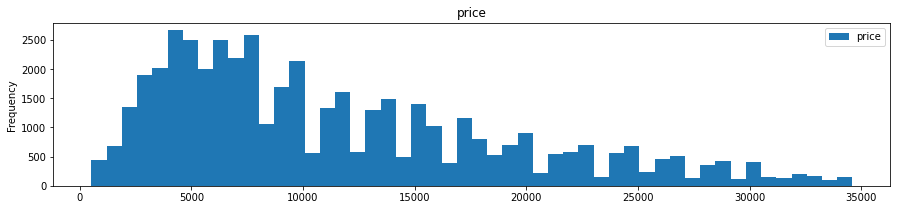

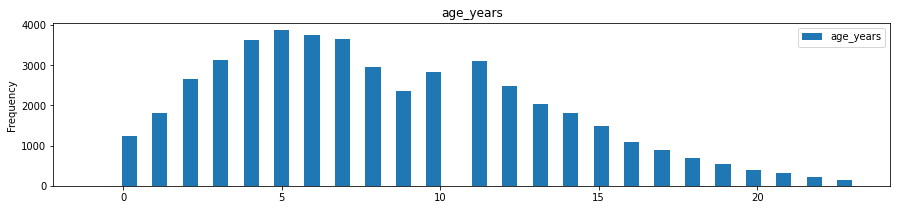

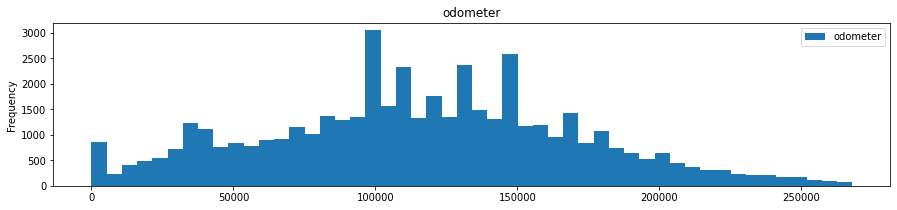

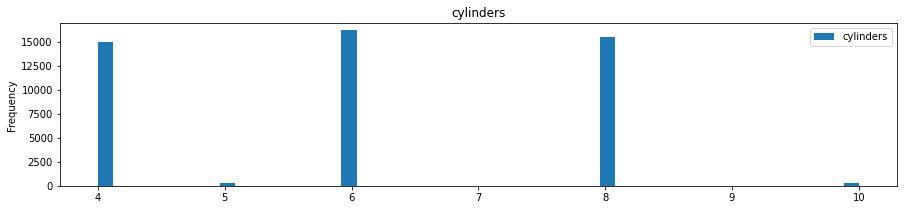

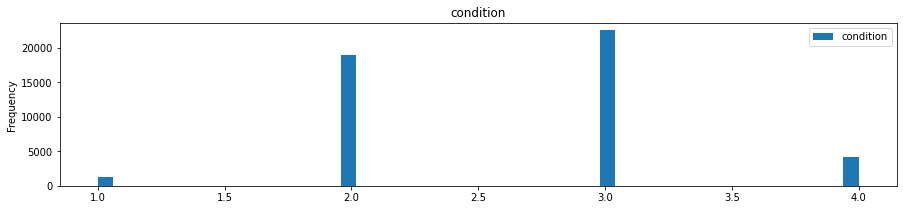

In [50]:
for i in variables:
    good_data.plot(y=i, bins=50, kind='hist',title= i, figsize=(15,3))

* Al observar los datos tanto por grafico como por descripción observamos que la información que nos muestra ha cambiado mucho, tiene mucho mas sentido y se la puede analizar mejor

## Periodo de colocación de los anuncios


Vamos a analizar el tiempo que tiene los vehículos anunciados, por lo que graficaremos nuestra data para ver como se comporta

[Estudia cuántos días los anuncios fueron mostrados (`days_listed`). Calcula la media y la mediana. Describe el periodo de colocación habitual de un anuncio. Determina cuándo se eliminaron rápidamente los anuncios y cuándo son publicados por un tiempo anormalmente largo.]

<AxesSubplot:ylabel='Frequency'>

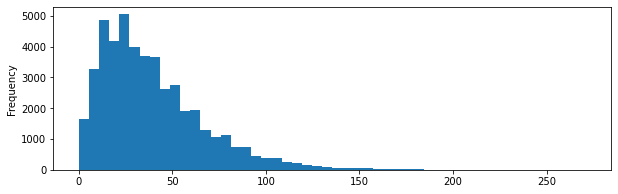

In [51]:
good_data['days_listed'].plot(kind='hist',bins=50,figsize=(10,3))


In [52]:
good_data['days_listed'].describe()

count    47000.000000
mean        39.557340
std         28.234086
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

gráfico de days_listed

q1=  19.0  | q3=  53.0  | IRQ=  34.0  | median : 33.0  | mean :  39.55734042553191  | lim min:  -32.0  | lmax:  104.0


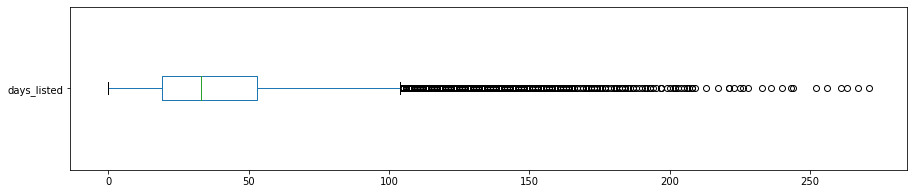

Número de vehiculos publicado con cero días :  48
Número de vehiculos publicado con mas de 104 días :  1478


In [53]:
Q1 = good_data['days_listed'].quantile(0.25)
Q3 = good_data['days_listed'].quantile(0.75)
Q2 = good_data['days_listed'].quantile(0.5)
IQR = Q3 - Q1
lmin= Q1 - 1.5*IQR
lmax= Q3 + 1.5*IQR
mean_listed=good_data['days_listed'].mean()
print('====='*20)
print('gráfico de days_listed')
print()
print('q1= ',Q1,' | q3= ',Q3,' | IRQ= ',IQR,' | median :',Q2,' | mean : ',mean_listed,' | lim min: ',lmin,' | lmax: ',lmax)
good_data['days_listed'].plot(kind='box', vert=False, figsize=(15,3))
    
plt.show()
print ('Número de vehiculos publicado con cero días : ',good_data[good_data['days_listed']==0]['days_listed'].count())
print ('Número de vehiculos publicado con mas de 104 días : ',good_data[good_data['days_listed']>104]['days_listed'].count())

* **viendo el gráfico, notamos que la media y la mediana están casi iguales, con una diferencia de 5 días, pero notamos que hay anuncios con cero días lo cual nos parece que pudo haber algún error de tipeo, como tambíen hay anuncios que pasan los 100 días, aunque el límite superior que sacamos es de 104, parece extraño que hayan anuncios que pasen de los 3 meses hasta 271 días de publicación**

## Precio promedio por cada tipo de vehículo
*Agruparemos nuestra data por la cantidad de anuncios y el precio promedio 

,count_type,mean_type
type,,
sedan,11610,7151.923428
SUV,11553,10739.197784
truck,10760,15590.701580
pickup,6249,15126.083853


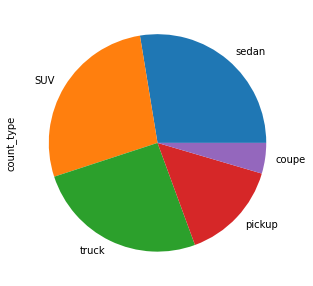

In [54]:
good_listed_price=good_data.pivot_table(index='type', values='price', aggfunc=['count','mean'])
good_listed_price.columns=['count_type','mean_type']
good_listed_price.sort_values(by='count_type', ascending=False, inplace=True)

good_listed_price['count_type'].head().plot(kind='pie', figsize=(5,5))
good_listed_price.head(4)



* Los 2 tipos con mayor cantidad de anuncions son 
    * sedan,	con un total de:  11353 publicaciones y un precio promedio de 6921.51
    * SUV, con un total de: 11307 publicaciones y un precio promedio de	10486.42

## Factores de precio

[¿Qué factores impactan más sobre el precio? Toma cada uno de los tipos más populares que has detectado en la fase anterior y estudia si el precio depende de la edad, millaje, condición, tipo de transmisión y color. Para las variables categóricas (tipo de transmisión y color) traza gráficos de caja y bigotes y crea gráficos de dispersión para el resto. Cuando analices variables categóricas, observa que las categorías deben tener al menos 50 anuncios; si no, sus parámetros no serán válidos para el análisis.]

[Utiliza matriz de correlación y diagramas de correlación]


In [55]:
sedan=good_data[good_data['type']=='sedan']
#sedan
suv=good_data[good_data['type']=='SUV']
#suv

### Matriz de correlación

In [56]:

print('matriz de correlacion para los SEDAN')
print(sedan[['price','age_years','average_km','condition']].corr())
print('')

matriz de correlacion para los SEDAN
               price  age_years  average_km  condition
price       1.000000  -0.674356    0.244896   0.321266
age_years  -0.674356   1.000000   -0.519304  -0.285839
average_km  0.244896  -0.519304    1.000000   0.042069
condition   0.321266  -0.285839    0.042069   1.000000



*la matriz nos muestra lo siguiente para los `SEDAN`

    *los años del carro aumentan los precios se comportan de manera inversa
    *en average_km el coeficiente es positivo, por lo que si el kilometraje sube, lo mismo hará su precio
    *en condition el coeficiente es positivo, por lo que si la condición es mejor, lo mismo hará su precio
    


In [57]:
print('matriz de correlacion para los SUV')
print(suv[['price','age_years','average_km','condition']].corr())

matriz de correlacion para los SUV
               price  age_years  average_km  condition
price       1.000000  -0.640028    0.261527   0.290465
age_years  -0.640028   1.000000   -0.574642  -0.289837
average_km  0.261527  -0.574642    1.000000   0.048427
condition   0.290465  -0.289837    0.048427   1.000000


*la matriz nos muestra lo siguiente para los `SUV`

    *para age_years, su coeficiente es negativo por lo que los años del carro aumentan los precios se comportan de manera inversa
    *en average_km el coeficiente es positivo, por lo que si el kilometraje sube, lo mismo hará su precio
    *en condition el coeficiente es positivo, por lo que si la condición es mejor, lo mismo hará su precio

### Precio vs Años

<AxesSubplot:title={'center':'SUV'}, xlabel='age_years', ylabel='price'>

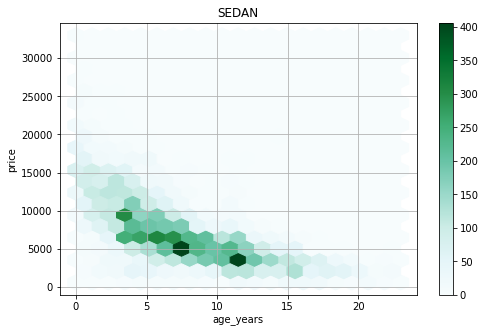

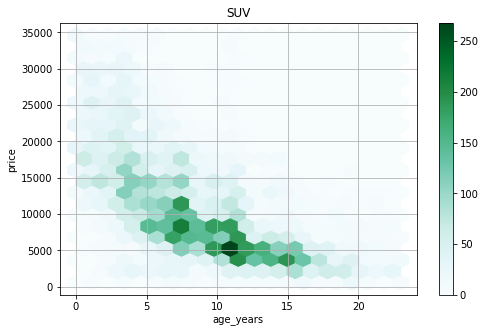

In [58]:
sedan.plot(x='age_years', y='price', kind='hexbin', gridsize=20, figsize=(8, 5), sharex=False, grid=True, title='SEDAN')
suv.plot(x='age_years', y='price', kind='hexbin', gridsize=20, figsize=(8, 5), sharex=False, grid=True, title='SUV')


* El gráfico nos enseña que en ambos tipos, mientras mas años tiene el vehículo, su precio baja

### Precio vs Kilometraje

<AxesSubplot:title={'center':'SUV'}, xlabel='average_km', ylabel='price'>

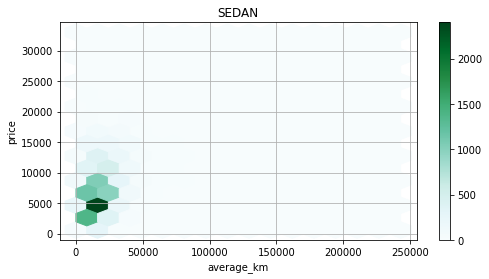

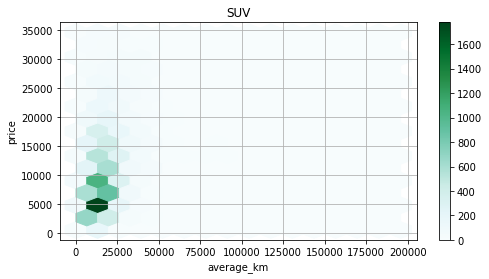

In [59]:
 sedan.plot(x='average_km', y='price', kind='hexbin', gridsize=15, figsize=(8, 4), sharex=False, grid=True, title='SEDAN')
suv.plot(x='average_km', y='price', kind='hexbin', gridsize=15, figsize=(8, 4), sharex=False, grid=True, title='SUV')

* se comprueba lo que dice el coeficiente de correlación: a menor kilometraje anual, menor precio

### Precio vs Condición 

--------------------------------------------------


<AxesSubplot:title={'center':'SUV'}, xlabel='condition'>

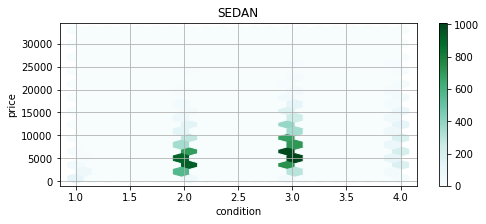

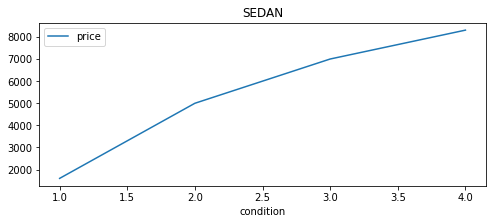

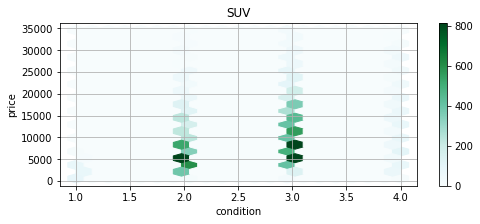

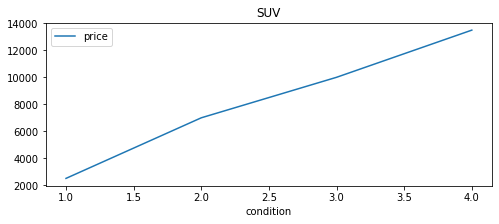

In [60]:
sedan.plot(x='condition', y='price', kind='hexbin', gridsize=20, figsize=(8, 3), sharex=False, grid=True, title='SEDAN')
sedan.pivot_table (index='condition', values='price', aggfunc='median').plot(figsize=(8, 3), title='SEDAN')
print('-----'*10)
#suv.plot(x='condition', y='price', kind='scatter', alpha=0.5,  figsize=(15,3)) 
suv.plot(x='condition', y='price', kind='hexbin', gridsize=20, figsize=(8, 3), sharex=False, grid=True, title='SUV')
suv.pivot_table (index='condition', values='price', aggfunc='median').plot(figsize=(8, 3), title='SUV')



* la grafica de datos nos enseña 
    para los sedan: que cuando la condición del carro mejora su valor tiende a subir 
    para los suv: que cuando la condición del carro tiene su mejor precio cuando esta en buenas condiciones y casi nuevo 

### Precio Vs Transmisión

Text(0.5, 1.0, 'SEDAN')

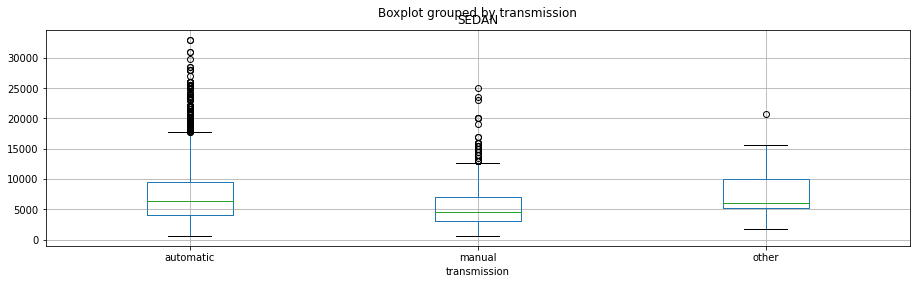

In [61]:
group= sedan.pivot_table(index='transmission',  values='price', aggfunc='count')
group.columns=['count']

filter_group=group[group['count']>50].reset_index()
dibuja= sedan[sedan['transmission'].isin(filter_group['transmission'])]
dibuja.boxplot(by="transmission", column="price", figsize=(15, 4))
plt.title('SEDAN')




Text(0.5, 1.0, 'SUV')

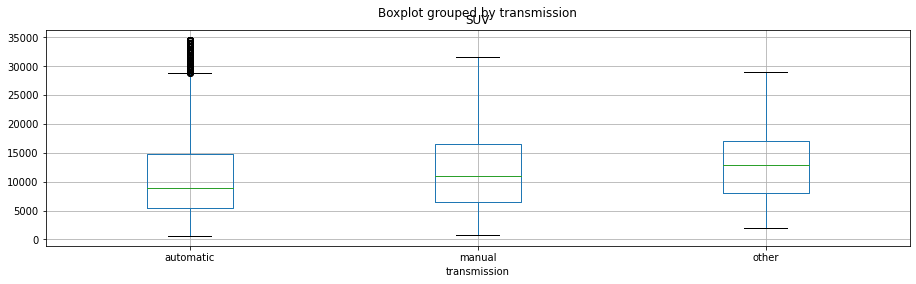

In [62]:
group= suv.pivot_table(index='transmission',  values='price', aggfunc='count')
group.columns=['count']

filter_group=group[group['count']>50].reset_index()
dibuja= suv[suv['transmission'].isin(filter_group['transmission'])]
dibuja.boxplot(by="transmission", column="price", figsize=(15, 4))
plt.title('SUV')

* El gráfico nos muestra que para los vehículos tipo sedan los que tienen tipo de transmisión automática son mas caros que los manuales

* en cambio para los suv se visualiza lo contrario

### Precio Vs Color

Text(0.5, 1.0, 'SEDAN')

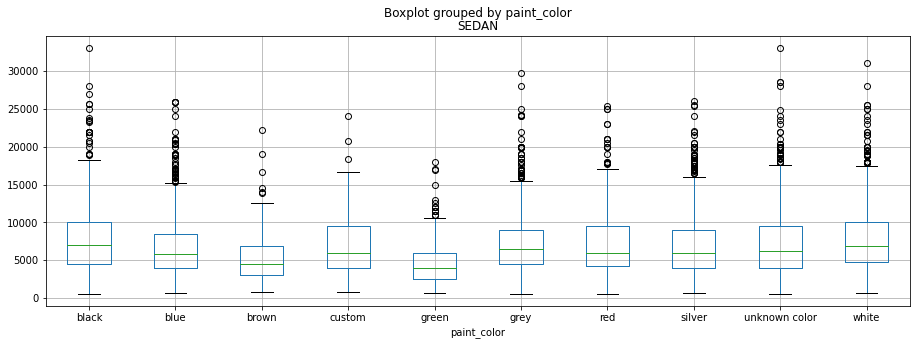

In [63]:
group= sedan.pivot_table(index='paint_color',  values='price', aggfunc='count')
group.columns=['count']

filter_group=group[group['count']>50].reset_index()
dibuja= sedan[sedan['paint_color'].isin(filter_group['paint_color'])]
dibuja.boxplot(by="paint_color", column="price", figsize=(15, 5))
plt.title('SEDAN')

Text(0.5, 1.0, 'SUV')

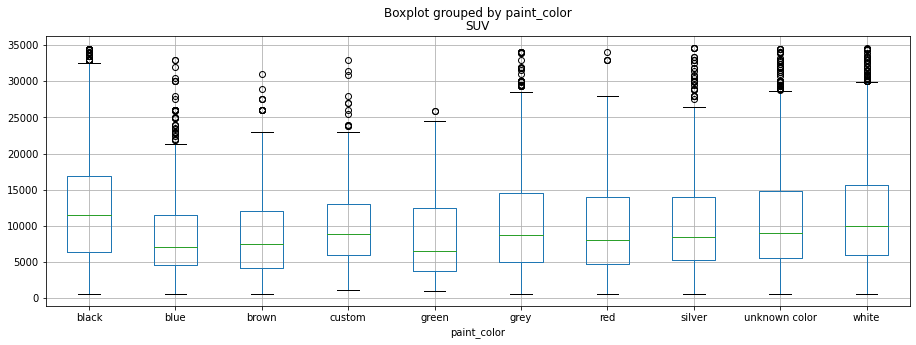

In [64]:
filter_group=group[group['count']>50].reset_index()
dibuja= suv[suv['paint_color'].isin(filter_group['paint_color'])]
dibuja.boxplot(by="paint_color", column="price", figsize=(15, 5))
plt.title('SUV')

**con respecto a los colores de los carros**

*`sedan` : los colores mas caros serían el negro y el blanco y los mas baratos serían el cafe y el verde

*`suv`   : los colores mas caros serían el naranja y el negro y los mas baratos serían el azul y el verde

## Conclusión general

[Enumera tus conclusiones importantes en esta sección final, asegúrate de que incluyan aquellas que te llevaron a la forma en que procesaste y analizaste los datos. Habla de los valores ausentes, duplicados, valores atípicos y las posibles razones y soluciones para los artefactos problemáticos que tuviste que abordar. No olvides eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

En la muestra que se nos ha dado en se procedió a analizarlo de la siguiente manera

* Se descubrieron que habian modelos de carros con duplicidad implícita, se procedió a encontrar los modelos mal escritos y se los corrigió
* El campo fecha estaba formateado como tipo texto y se lo pasó a tipo fecha
* se encontraron 5 columnas que tenían varios registros vacíos de los cuales para:
    * model_year se tuvo que utilizar la moda y Agrupamos por modelo y por transmisión para sacar el año mas repetido
    * cylinder de igual manera se sacó la moda y se agrupo por modelo y transmisión
    * odometer se tuvo que agrupar por los años que tiene el vehículo para sacar la mediana del kilometraje, se escogió la mediana ya que había valores muy grandes como para sacar un promedio lo cual nos daría un kilometraje erroneo, clasificamos tanto por condición como por rango de fechas
    * is_4wd se identificó que casi la mitad de la muestra no tenía una clasificación y ya que esta solo tenía dos valores 1 y 0, como los registros llenos estaban con 1, la lógica sería que los vacíos deben ser 0 
    * paint_color, en esta categoría no habia un patron para determinar el color del carro, por lo que se creó una nueva categoría llamada "unknown color"
  
* Luego se agregaron otras columnas para facilitar los estudios mas adelante como el calculo de los años del carro, año de la publicación y el kilometraje promedio por año

* para el estudio de los datos encontramos datos incoherentes para los precios, kilometraje y años del carro
  se utilizó para esto histogramas y diagramas de caja para determinar los limites superiores e inferiores y filtrar los datos por lo que realmente se necesita
  
* para las publicaciones rapidas y muy largas se encontraron 47 regristros con 0 dias y 1443 con anuncios de mas de 104 días
* para los precio promedio por tipo de vehículo se procedió a agruparlos por tipo y la cantidad de anuncios y se encontró que los dos modelos más populares son: `sedan` y `SUV` 
         * sedan, con un total de: 11353 publicaciones y un precio promedio de 6921.51
         * SUV, con un total de: 11307 publicaciones y un precio promedio de 10486.42
para conoce en que afecta el precio de estos dos modelos contrastamos  por los siguientes factores

* El precio de los vehiculos, indiferentemente su modelo, mientras mas años tiene el vehículo, su precio baja

* Al igual que los años, cuando el kilometraje sube tiene el vehículo su precio tiende a bajar

* En cuanto a la condición 
    para los sedan: que cuando la condición del carro mejora su valor tiende a subir 
    para los suv: que cuando la condición del carro tiene su mejor precio cuando esta en buenas condiciones y casi nuevo 

* para el factor de transmisión, los vehículos tipo sedan los que tienen tipo de transmisión automática son mas caros que los manuales, en cambio para los suv se visualiza lo contrario

* en el factor de pintura de los carros 

    * tipo : **Costosos        |   Baratos**
                ---------       | --------------
    * sedan:   negro y blanco   |  cafe y verde
    * suv :    naranja y negro  |  azul y verde




